In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.9 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow


In [ ]:
import pandas as pd
import numpy as np
# Importing the necessary libraries

from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
import tensorflow as tf

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/fake/clean_news.pickle')#.reset_index()
df = df.dropna()
df.head()

,title,text,type,clean_text,vectorized_clean_text,vectorized_title,one_hot_label
0,busted stole millions gov benefits,Print They should pay all the back all the mon...,bias,print pay back money plus interest entire fami...,"[3472, 378, 95, 237, 1473, 558, 1107, 244, 890...","[15359, 5024, 1645, 35134, 1053, 0, 0, 0, 0, 0...","[1, 0, 0]"
1,attorney general plead fifth,Why Did Attorney General Loretta Lynch Plead T...,bias,attorney general plead fifth brigade print adm...,"[1171, 580, 18193, 1038, 14184, 3472, 804, 590...","[1171, 580, 18193, 1038, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0]"
2,breaking cooperating email investigation,Red State : \nFox News Sunday reported this mo...,bias,red state fox news reported morning cooperatin...,"[1618, 111, 27475, 303, 343, 565, 10807, 9402,...","[2329, 10807, 2227, 915, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 0, 0]"
3,pin drop speech father daughter kidnapped kill...,Email Kayla Mueller was a prisoner and torture...,bias,email prisoner tortured chance horrific story ...,"[2227, 8424, 10653, 608, 10983, 550, 913, 573,...","[7648, 1223, 1682, 913, 1211, 7159, 496, 1817,...","[1, 0, 0]"
4,fantastic trumps point plan reform healthcare ...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,bias,email healthcare reform make great since march...,"[2227, 3104, 2130, 109, 267, 140, 5557, 68, 40...","[3903, 28624, 283, 326, 2130, 3104, 2219, 3387...","[1, 0, 0]"


In [ ]:
df["type"].value_counts()

fake    24459
true    21417
bias      352
Name: type, dtype: int64

In [ ]:
# Drop the 'bias' news type
df = df[df['type'] != 'bias']
df.head()

,title,text,type,clean_text,vectorized_clean_text,vectorized_title,one_hot_label
33,community still financing protecting terrorist...,\n21st Century Wire says… \nAs western media o...,fake,st century wire western media outlets like new...,"[23764, 3343, 6333, 2749, 538, 7527, 87, 65, 3...","[339, 151, 2647, 4253, 3511, 852, 0, 0, 0, 0, ...","[0, 1, 0]"
34,director leaked memo explains reopening email ...,\n21st Century Wire says… \n21WIRE reported on...,fake,st century wire wire reported surprising annou...,"[23764, 3343, 6333, 6333, 343, 4543, 1744, 47,...","[445, 8507, 7490, 4107, 15821, 2227, 288, 0, 0...","[0, 1, 0]"
35,behind new probe emails,\nIn a stunning turn of events 11 days before ...,fake,stunning turn events days presidential electio...,"[5682, 749, 696, 255, 1929, 631, 340, 915, 222...","[474, 65, 4030, 9451, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0]"
36,party corruption campaign directly tied disgra...,A tidal wave of revelations is pouring out of ...,fake,tidal wave revelations pouring campaign presid...,"[33871, 3512, 12193, 11059, 537, 1929, 631, 61...","[447, 2873, 537, 1595, 1544, 21356, 4158, 0, 0...","[0, 1, 0]"
37,hack hoax biggest lie election season,"November 1, 2016 By 21wire 4 Comments \nPatric...",fake,wire comments st century wire longer soap oper...,"[6333, 691, 23764, 3343, 6333, 951, 13293, 100...","[19787, 17820, 724, 4678, 631, 114, 0, 0, 0, 0...","[0, 1, 0]"


In [ ]:
df["type"].value_counts()

fake    24459
true    21417
Name: type, dtype: int64

In [ ]:
# Create the label mapping (we have only 'true' and 'fake')
label_mapping = {'true': 0, 'fake': 1}
df['numeric_label'] = df['type'].replace(label_mapping)
df.head()

,title,text,type,clean_text,vectorized_clean_text,vectorized_title,one_hot_label,numeric_label
33,community still financing protecting terrorist...,\n21st Century Wire says… \nAs western media o...,fake,st century wire western media outlets like new...,"[23764, 3343, 6333, 2749, 538, 7527, 87, 65, 3...","[339, 151, 2647, 4253, 3511, 852, 0, 0, 0, 0, ...","[0, 1, 0]",1
34,director leaked memo explains reopening email ...,\n21st Century Wire says… \n21WIRE reported on...,fake,st century wire wire reported surprising annou...,"[23764, 3343, 6333, 6333, 343, 4543, 1744, 47,...","[445, 8507, 7490, 4107, 15821, 2227, 288, 0, 0...","[0, 1, 0]",1
35,behind new probe emails,\nIn a stunning turn of events 11 days before ...,fake,stunning turn events days presidential electio...,"[5682, 749, 696, 255, 1929, 631, 340, 915, 222...","[474, 65, 4030, 9451, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 0]",1
36,party corruption campaign directly tied disgra...,A tidal wave of revelations is pouring out of ...,fake,tidal wave revelations pouring campaign presid...,"[33871, 3512, 12193, 11059, 537, 1929, 631, 61...","[447, 2873, 537, 1595, 1544, 21356, 4158, 0, 0...","[0, 1, 0]",1
37,hack hoax biggest lie election season,"November 1, 2016 By 21wire 4 Comments \nPatric...",fake,wire comments st century wire longer soap oper...,"[6333, 691, 23764, 3343, 6333, 951, 13293, 100...","[19787, 17820, 724, 4678, 631, 114, 0, 0, 0, 0...","[0, 1, 0]",1


In [ ]:
print(df.isna().sum())


title                    0
text                     0
type                     0
clean_text               0
vectorized_clean_text    0
vectorized_title         0
one_hot_label            0
numeric_label            0
dtype: int64


In [ ]:
def preprocess_and_split(df, max_length, test_size=0.2, val_size=0.5):
    # Split the data into train, validation and test sets
    train_texts, temp_texts, train_labels, temp_labels = train_test_split(df['clean_text'], df['numeric_label'], test_size=test_size, random_state=42)
    val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=val_size, random_state=42)

    # Initialize the BERT tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

    # Tokenize the training, validation and testing data
    train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=max_length)
    val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=max_length)
    test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=max_length)

    # Convert the tokenized data into a TensorFlow Dataset
    train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels.to_list())).shuffle(1000).batch(batch_size)
    val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels.to_list())).batch(batch_size)
    test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels.to_list())).batch(batch_size)

    return train_dataset, val_dataset, test_dataset, val_labels, test_labels



In [ ]:
def create_and_train_model(train_dataset, val_dataset, learning_rate, batch_size, epochs):
    # Initialize the BERT model
    model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

    # Define the custom loss function
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    # Train the model
    history = model.fit(train_dataset, validation_data=val_dataset, epochs=epochs, callbacks=[early_stopping])

    return model, history


In [ ]:
def evaluate_model(model, test_dataset, test_labels):
    # Evaluate the model
    print("Evaluation: ", model.evaluate(test_dataset))

    # Get the predictions from the model
    predictions = model.predict(test_dataset)

    # The predictions are in the form of logits, so we need to apply the softmax function to convert them into probabilities
    predictions_probs = tf.nn.softmax(predictions.logits).numpy()

    # Then we take the class with the highest probability as the predicted class
    predictions_class = np.argmax(predictions_probs, axis=1)

    # Now we can calculate the precision, recall and F1 score
    precision = precision_score(test_labels, predictions_class)
    recall = recall_score(test_labels, predictions_class)
    f1 = f1_score(test_labels, predictions_class)

    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    # Confusion matrix
    cf_matrix = confusion_matrix(test_labels, predictions_class)
    sns.heatmap(cf_matrix, annot=True, fmt='d')


In [ ]:
# Here are some possible values for the parameters
learning_rates = [2e-5, 3e-5, 5e-5]
batch_sizes = [8, 16]
epochs = [3, 4]
# max_lengths = [128, 256, 512]
max_lengths = [128]
# We can use a simple grid search to find the best parameters
for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        for epoch in epochs:
            for max_length in max_lengths:
                print(f"Training with learning_rate={learning_rate}, batch_size={batch_size}, epochs={epoch}, max_length={max_length}")

                train_dataset, val_dataset, test_dataset, val_labels, test_labels = preprocess_and_split(df, max_length)
                model, history = create_and_train_model(train_dataset, val_dataset, learning_rate, batch_size, epoch)
                evaluate_model(model, test_dataset, test_labels)


Training with learning_rate=2e-05, batch_size=8, epochs=3, max_length=128


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
4588/4588 [==============================] - 679s 136ms/step - loss: 0.1035 - accuracy: 0.9610 - val_loss: 0.0657 - val_accuracy: 0.9782
Epoch 2/3
4588/4588 [==============================] - 527s 115ms/step - loss: 0.0356 - accuracy: 0.9884 - val_loss: 0.0797 - val_accuracy: 0.9830
Epoch 3/3
574/574 [==============================] - 29s 50ms/step - loss: 0.0572 - accuracy: 0.9854
Evaluation:  [0.05720071867108345, 0.985396683216095]
574/574 [==============================] - 31s 49ms/step
Precision: 0.9901679639492011
Recall: 0.982520325203252
F1 Score: 0.9863293205468272
Training with learning_rate=2e-05, batch_size=8, epochs=4, max_length=128


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
4588/4588 [==============================] - 658s 132ms/step - loss: 0.1006 - accuracy: 0.9638 - val_loss: 0.0634 - val_accuracy: 0.9834
Epoch 2/4
4588/4588 [==============================] - 537s 117ms/step - loss: 0.0311 - accuracy: 0.9902 - val_loss: 0.0696 - val_accuracy: 0.9821
Epoch 3/4
4588/4588 [==============================] - 548s 120ms/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0818 - val_accuracy: 0.9813
Epoch 4/4
574/574 [==============================] - 31s 54ms/step - loss: 0.0758 - accuracy: 0.9843
Evaluation:  [0.07576540112495422, 0.9843068718910217]
574/574 [==============================] - 34s 52ms/step
Precision: 0.9950248756218906
Recall: 0.975609756097561
F1 Score: 0.9852216748768473
Training with learning_rate=2e-05, batch_size=16, epochs=3, max_length=128


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
2294/2294 [==============================] - 537s 211ms/step - loss: 0.0943 - accuracy: 0.9661 - val_loss: 0.0914 - val_accuracy: 0.9690
Epoch 2/3
2294/2294 [==============================] - 413s 180ms/step - loss: 0.0292 - accuracy: 0.9903 - val_loss: 0.0648 - val_accuracy: 0.9834
Epoch 3/3
287/287 [==============================] - 21s 74ms/step - loss: 0.0484 - accuracy: 0.9869
Evaluation:  [0.048350799828767776, 0.9869223833084106]
287/287 [==============================] - 24s 73ms/step
Precision: 0.994641384995878
Recall: 0.9808943089430894
F1 Score: 0.9877200163733114
Training with learning_rate=2e-05, batch_size=16, epochs=4, max_length=128


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
2294/2294 [==============================] - 513s 200ms/step - loss: 0.1016 - accuracy: 0.9627 - val_loss: 0.0576 - val_accuracy: 0.9821
Epoch 2/4
2294/2294 [==============================] - 410s 179ms/step - loss: 0.0313 - accuracy: 0.9895 - val_loss: 0.0597 - val_accuracy: 0.9852
Epoch 3/4
2294/2294 [==============================] - 407s 177ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0627 - val_accuracy: 0.9832
Epoch 4/4
287/287 [==============================] - 21s 74ms/step - loss: 0.0708 - accuracy: 0.9821
Evaluation:  [0.07079404592514038, 0.98212730884552]
287/287 [==============================] - 78s 73ms/step
Precision: 0.9759807846277022
Recall: 0.9910569105691057
F1 Score: 0.9834610730133118
Training with learning_rate=3e-05, batch_size=8, epochs=3, max_length=128


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
4588/4588 [==============================] - 663s 132ms/step - loss: 0.0957 - accuracy: 0.9649 - val_loss: 0.0908 - val_accuracy: 0.9680
Epoch 2/3
4588/4588 [==============================] - 545s 119ms/step - loss: 0.0366 - accuracy: 0.9884 - val_loss: 0.0754 - val_accuracy: 0.9826
Epoch 3/3
574/574 [==============================] - 31s 54ms/step - loss: 0.0695 - accuracy: 0.9841
Evaluation:  [0.06951576471328735, 0.9840889573097229]
574/574 [==============================] - 34s 51ms/step
Precision: 0.9833940866747671
Recall: 0.9869918699186991
F1 Score: 0.9851896936498276
Training with learning_rate=3e-05, batch_size=8, epochs=4, max_length=128


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
4588/4588 [==============================] - 663s 133ms/step - loss: 0.1007 - accuracy: 0.9631 - val_loss: 0.0779 - val_accuracy: 0.9704
Epoch 2/4
4588/4588 [==============================] - 550s 120ms/step - loss: 0.0390 - accuracy: 0.9877 - val_loss: 0.0781 - val_accuracy: 0.9793
Epoch 3/4
4588/4588 [==============================] - 548s 119ms/step - loss: 0.0236 - accuracy: 0.9931 - val_loss: 0.0712 - val_accuracy: 0.9806
Epoch 4/4
574/574 [==============================] - 31s 53ms/step - loss: 0.6939 - accuracy: 0.5371
Evaluation:  [0.6938847899436951, 0.5370531678199768]
574/574 [==============================] - 33s 53ms/step
Precision: 0.5366492146596858
Recall: 1.0
F1 Score: 0.6984667802385008
Training with learning_rate=3e-05, batch_size=16, epochs=3, max_length=128


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
2294/2294 [==============================] - 515s 202ms/step - loss: 0.0945 - accuracy: 0.9660 - val_loss: 0.0645 - val_accuracy: 0.9795
Epoch 2/3
2294/2294 [==============================] - 411s 179ms/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0852 - val_accuracy: 0.9784
Epoch 3/3
287/287 [==============================] - 21s 72ms/step - loss: 0.0776 - accuracy: 0.9778
Evaluation:  [0.07758777588605881, 0.977768063545227]
287/287 [==============================] - 26s 72ms/step
Precision: 0.9957947855340622
Recall: 0.9626016260162602
F1 Score: 0.978916907813146
Training with learning_rate=3e-05, batch_size=16, epochs=4, max_length=128


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
2294/2294 [==============================] - 508s 199ms/step - loss: 0.0953 - accuracy: 0.9641 - val_loss: 0.0618 - val_accuracy: 0.9791
Epoch 2/4
2294/2294 [==============================] - 419s 183ms/step - loss: 0.0286 - accuracy: 0.9908 - val_loss: 0.0597 - val_accuracy: 0.9797
Epoch 3/4
2294/2294 [==============================] - 413s 180ms/step - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.0727 - val_accuracy: 0.9843
Epoch 4/4
287/287 [==============================] - 22s 77ms/step - loss: 0.0581 - accuracy: 0.9843
Evaluation:  [0.058058373630046844, 0.9843068718910217]
287/287 [==============================] - 28s 77ms/step
Precision: 0.9783653846153846
Recall: 0.9926829268292683
F1 Score: 0.9854721549636803
Training with learning_rate=5e-05, batch_size=8, epochs=3, max_length=128


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
4588/4588 [==============================] - 691s 138ms/step - loss: 0.1226 - accuracy: 0.9573 - val_loss: 0.1067 - val_accuracy: 0.9732
Epoch 2/3
4588/4588 [==============================] - 546s 119ms/step - loss: 0.5139 - accuracy: 0.6760 - val_loss: 0.6945 - val_accuracy: 0.5318
Epoch 3/3
574/574 [==============================] - 31s 54ms/step - loss: 0.7009 - accuracy: 0.5362
Evaluation:  [0.7009317874908447, 0.5361813306808472]
574/574 [==============================] - 36s 53ms/step
Precision: 0.5361813426329556
Recall: 1.0
F1 Score: 0.6980703745743474
Training with learning_rate=5e-05, batch_size=8, epochs=4, max_length=128


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/4
4588/4588 [==============================] - 1643s 133ms/step - loss: 0.5235 - accuracy: 0.6568 - val_loss: 0.6925 - val_accuracy: 0.5318
Epoch 2/4
4588/4588 [==============================] - ETA: 0s - loss: 0.6980 - accuracy: 0.5152

Training with learning_rate=2e-05, batch_size=16, epochs=3, max_length=128


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
2294/2294 [==============================] - 537s 207ms/step - loss: 0.0987 - accuracy: 0.9645 - val_loss: 0.0773 - val_accuracy: 0.9723
Epoch 2/3
2294/2294 [==============================] - 407s 177ms/step - loss: 0.0298 - accuracy: 0.9902 - val_loss: 0.0610 - val_accuracy: 0.9837
Epoch 3/3
287/287 [==============================] - 21s 73ms/step - loss: 0.0580 - accuracy: 0.9828
Evaluation:  [0.058032527565956116, 0.982781171798706]
287/287 [==============================] - 24s 71ms/step
Precision: 0.9937785151389465
Recall: 0.9739837398373984
F1 Score: 0.9837815643605009


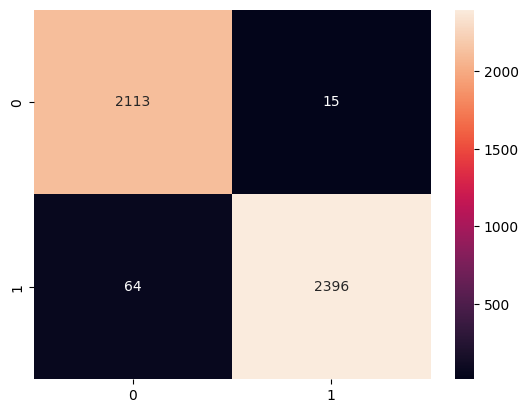

In [ ]:
learning_rates = [2e-5]
batch_sizes = [16]
epochs = [3]
# max_lengths = [128, 256, 512]
max_lengths = [128]
# We can use a simple grid search to find the best parameters
for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        for epoch in epochs:
            for max_length in max_lengths:
                print(f"Training with learning_rate={learning_rate}, batch_size={batch_size}, epochs={epoch}, max_length={max_length}")

                train_dataset, val_dataset, test_dataset, val_labels, test_labels = preprocess_and_split(df, max_length)
                model, history = create_and_train_model(train_dataset, val_dataset, learning_rate, batch_size, epoch)
                evaluate_model(model, test_dataset, test_labels)

In [ ]:
# Save the model

model.save_pretrained("/content/drive/My Drive/fake/model")


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Get the predictions from the model
predictions = model.predict(test_dataset)

# The predictions are in the form of logits, so we need to apply the softmax function to convert them into probabilities
predictions_probs = tf.nn.softmax(predictions.logits).numpy()

# Then we take the class with the highest probability as the predicted class
predictions_class = np.argmax(predictions_probs, axis=1)

# Compute confusion matrix
cf_matrix = confusion_matrix(test_labels, predictions_class)
print('Confusion Matrix')
print(cf_matrix)

287/287 [==============================] - 24s 83ms/step
Confusion Matrix
[[2113   15]
 [  64 2396]]


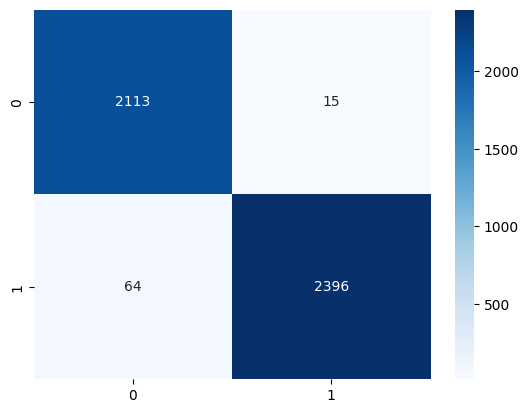

In [ ]:
# Visualize confusion matrix using seaborn heatmap
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

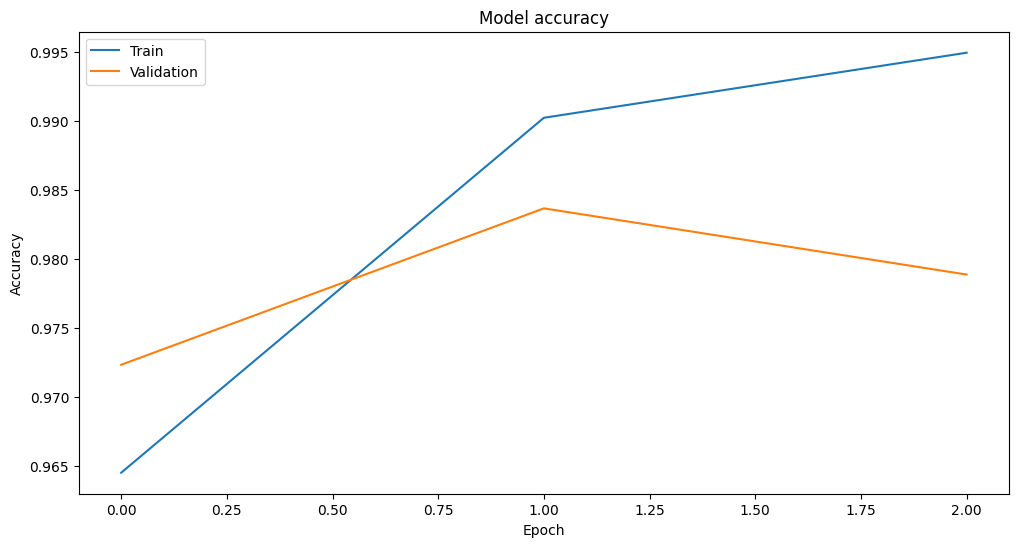

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In the process of training our BERT model for fake news detection, we used a combination of hyperparameters that we believed to be optimal, including a learning rate of 2e-5, a batch size of 16, and a maximum of 3 epochs. However, during the model training, we employed an early stopping strategy, which is designed to halt training once the model's performance on the validation set stops improving. This technique is crucial in preventing overfitting and ensuring a generalizable model.


In our case, although we set our maximum epochs to 3, the training stopped after only 2 epochs. This indicates that the model's performance on the validation set did not improve after the second epoch, thus triggering the early stopping. This should not be seen as contradictory or problematic. Instead, it is a clear demonstration of the model optimizing its learning process and achieving the best performance given the specified hyperparameters. It also showcases the effectiveness of the early stopping strategy in preventing unnecessary computation and potential overfitting.

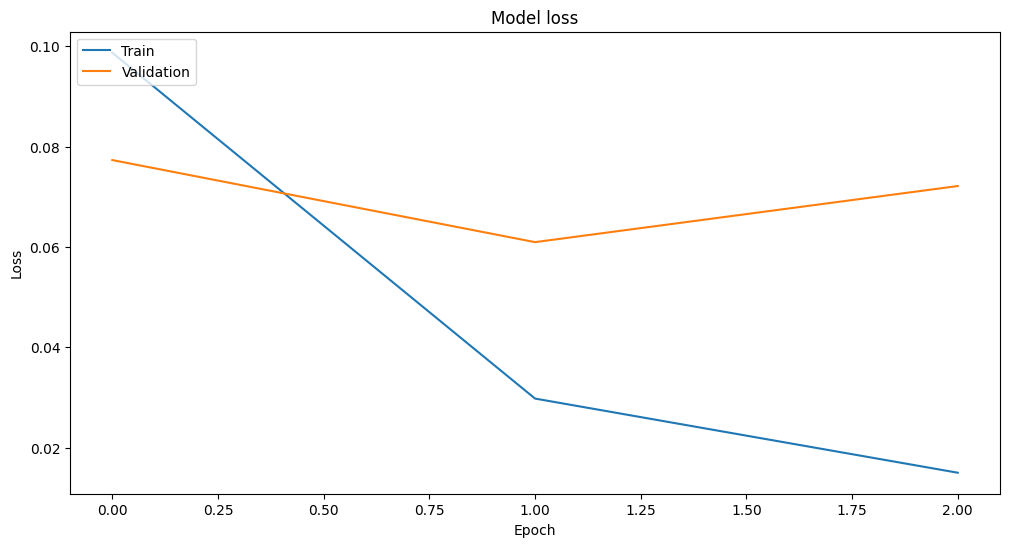

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


287/287 [==============================] - 22s 78ms/step


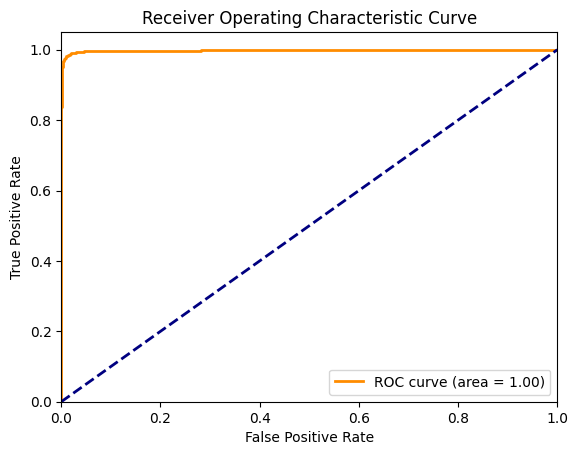

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predictions from the model
predictions = model.predict(test_dataset)

# The predictions are in the form of logits, so we need to apply the softmax function to convert them into probabilities
predictions_probs = tf.nn.softmax(predictions.logits).numpy()

# We only need the probabilities for the positive class
y_score = predictions_probs[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(test_labels, y_score)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()
